In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [17]:
def analysis_graph(G):

    num_edges = len(G.edges)
    print('num_edges = ',num_edges)
    num_nodes = len(G.nodes)
    print('num_nodes = ',num_nodes)
    average_degree = (num_edges * 2) / num_nodes
    print('average_degree = ',average_degree)
    density = nx.density(G)
    print('density = ',density)

    if nx.is_connected(G) :
    
        diameter = nx.diameter(G)
        print('diameter = ',diameter)
        average_shortest_path_length = nx.average_shortest_path_length(G)
        print('average_shortest_path_length =',average_shortest_path_length )

    else:
        largest_cc = max(nx.connected_components(G), key=len)
        G_cc = G.subgraph(largest_cc)
        diameter = nx.diameter(G_cc)
        print('diameter = ',diameter)
        average_shortest_path_length = nx.average_shortest_path_length(G_cc)
        print('average_shortest_path_length =',average_shortest_path_length )


    
    # Compute the shortest path lengths between all pairs of nodes
    #path_lengths = dict(nx.shortest_path_length(G))
    # Convert the path lengths to a list
    #path_length_list = [length for node in path_lengths.values() for length in node.values()]
    # Sort the list of path lengths in ascending order
    #path_length_list.sort()
    # Calculate the effective diameter at the 90th percentile
    #percentile_index = int(len(path_length_list) * 0.90)
    #eff_diameter = path_length_list[percentile_index]
    #print("Effective diameter = ", eff_diameter)


    avg_clustering = nx.average_clustering(G)
    print('avg_clustering = ',avg_clustering)
    transivity = nx.transitivity(G)
    print('transivity = ',transivity)
    assortativity = nx.degree_assortativity_coefficient(G)
    print('assortativity = ',assortativity)
    
    # calculate degree distribution
    degree_dist = sorted([d for n, d in G.degree()],reverse=True)
    sns.histplot(degree_dist,kde=True);


    # calculate degree centrality
    degree_centrality = nx.degree_centrality(G)
    degree_list = np.array(list(degree_centrality.values())) #attention: degress are normalized(/n-1)
    degree_centralization = np.sum(max(degree_list)-degree_list) / (num_nodes-2)  # sum(Cmax-Ci)/(n-1)(n-2)
    
    # calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    betweenness_list = np.array(list(betweenness_centrality.values())) #attention: betweenness are normalized(/n-1)
    betweenness_centralization = np.sum(max(betweenness_list)-betweenness_list) / (num_nodes-1)

    # calculate closeness centrality
    closeness_centrality = nx.closeness_centrality(G)
    closeness_list = np.array(list(closeness_centrality.values())) #attention: betweenness are normalized(/(n-1))*2
    closeness_centralization = (np.sum(max(closeness_list)-closeness_list) * 2) / (num_nodes-1)

    # precise version for closeness_centralization
    # denom = (num_nodes-1)*(num_nodes-2)/(1+2*(num_nodes-2)) # for big num_nodes == (num_nodes-1)/2
    # closeness_centralization = np.sum(max(closeness_list)-closeness_list) / denom


    # calculate PageRank centrality
    pagerank_centrality = nx.pagerank(G)
    pagerank_list = np.array(list(pagerank_centrality.values())) # sum(pagerank_list)=1
    pagerank_centralization = np.sum(max(pagerank_list)-pagerank_list) / (num_nodes-1)


    # print centralization metrics
    print('\n centralization metrics ')
    print('----------------------------')
    print('degree_centralization = ',degree_centralization)
    print('betweenness_centralization = ',betweenness_centralization)
    print('closeness_centralization = ',closeness_centralization)
    print('pagerank_centralization = ',pagerank_centralization)

In [6]:
# barabasi_albert_graph(n, m, seed=None, initial_graph=None)
# n : Number of nodes
# m : Number of edges to attach from a new node to existing nodes
G = nx.barabasi_albert_graph(4039, 22, seed=121)

num_edges =  88374
num_nodes =  4039
average_degree =  43.76033671700916
density =  0.01083713143066101
diameter =  3
average_shortest_path_length = 2.508347598041434
avg_clustering =  0.03810610424080777
transivity =  0.03622754482713861
assortativity =  -0.010519993887111834

 centralization metrics 
----------------------------
degree_centralization =  0.11106035884266671
betweenness_centralization =  0.02193767615326062
closeness_centralization =  0.2632557234666433
pagerank_centralization =  0.002142513801047378


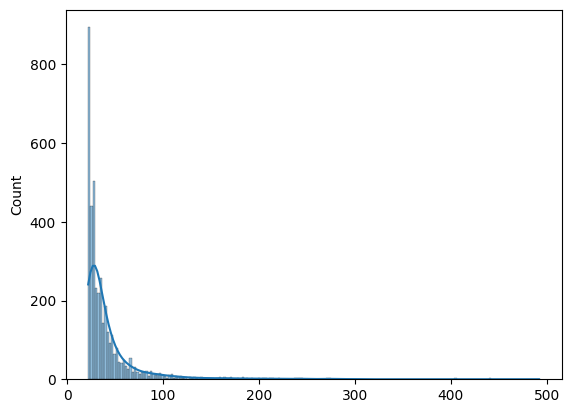

In [10]:
analysis_graph(G)

num_edges =  88751
num_nodes =  4039
average_degree =  43.947016588264425
density =  0.010883362206108079
diameter =  4
average_shortest_path_length = 2.602518583974647
avg_clustering =  0.010903787841274364
transivity =  0.01089837090175764
assortativity =  0.005400086939055748

 centralization metrics 
----------------------------
degree_centralization =  0.007693998910278047
betweenness_centralization =  0.0007096989560902068
closeness_centralization =  0.05865218344425993
pagerank_centralization =  0.00014786549389922217


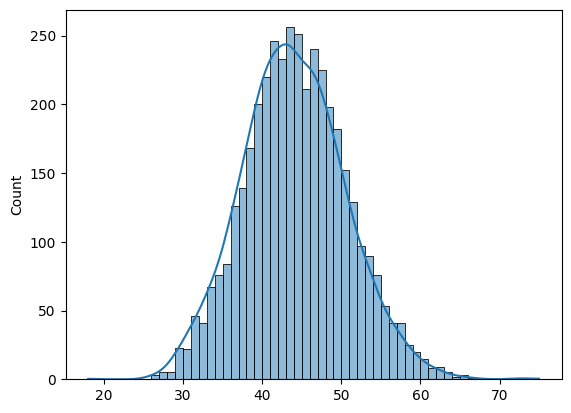

In [11]:
# p*(n-1) = avg_deg
n = 4039
avg_deg = 43.69
p = avg_deg/(n-1)
G2 =nx.erdos_renyi_graph(4039, p)
analysis_graph(G2)

num_edges =  88858
num_nodes =  4039
average_degree =  44.0
density =  0.010896483407627538
diameter =  4
average_shortest_path_length = 2.816757760914786
avg_clustering =  0.378436599821705
transivity =  0.37565309589478113
assortativity =  -0.008671287352130559

 centralization metrics 
----------------------------
degree_centralization =  0.00247770038977006
betweenness_centralization =  0.0006206719622424965
closeness_centralization =  0.02656172624505245
pagerank_centralization =  4.860186494357137e-05


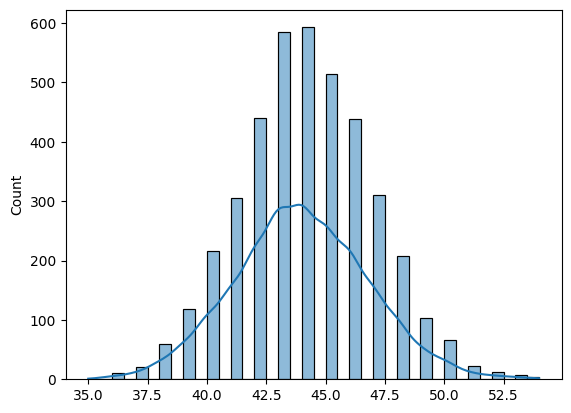

In [13]:
# n : The number of nodes
# k :Each node is connected to k nearest neighbors in ring topology
# p : The probability of rewiring each edge
n = 4039
k = 44
p = 0.2
G3 = nx.watts_strogatz_graph(n, k, p, seed=1984)
analysis_graph(G3)

In [ ]:
n = 4039
k = 44
for i in range(0.1,0.5,0.05)
p = 0.2
G3 = nx.watts_strogatz_graph(n, k, p, seed=1984)
analysis_graph(G3)

In [38]:
# Social circles: Facebook 

n = 4039
k = 44
for i in range(1,10):
    p = i/100
    print("p = ", p)
    G = nx.watts_strogatz_graph(n, k, p, seed=1984)
    diameter = nx.diameter(G)
    avg_clustering = nx.average_clustering(G)
    print('diameter = ',diameter)
    print('avg_clustering = ',avg_clustering)
    

p =  0.01
diameter =  6
avg_clustering =  0.7131354209160876
p =  0.02
diameter =  5
avg_clustering =  0.6913270796167669
p =  0.03
diameter =  5
avg_clustering =  0.6695099816210978
p =  0.04
diameter =  5
avg_clustering =  0.6505113815171939
p =  0.05
diameter =  5
avg_clustering =  0.6307506619641278
p =  0.06
diameter =  5
avg_clustering =  0.610206141246515
p =  0.07
diameter =  5
avg_clustering =  0.5912563593154441
p =  0.08


KeyboardInterrupt: 

In [7]:
# citation network
n = 27770
k = 25
for i in range(20,45,5):
    p = i/100
    print("p = ", p)
    G = nx.watts_strogatz_graph(n, k, p, seed=1984)
    diameter = nx.diameter(G)
    avg_clustering = nx.average_clustering(G)
    print('diameter = ',diameter)
    print('avg_clustering = ',avg_clustering)

p =  0.2
diameter =  6
avg_clustering =  0.3688652643672363
p =  0.25
diameter =  5
avg_clustering =  0.30539782653791603
p =  0.3
diameter =  5
avg_clustering =  0.24778368345158167
p =  0.35


KeyboardInterrupt: 

In [14]:
# Hamsterster friendships
n = 1858
k = 14
for i in range(30,50):
    p = i/100
    print("p = ", p)
    G = nx.watts_strogatz_graph(n, k, p, seed=1984)
    diameter = nx.diameter(G)
    avg_clustering = nx.average_clustering(G)
    print('diameter = ',diameter)
    print('avg_clustering = ',avg_clustering)

p =  0.3
diameter =  5
avg_clustering =  0.2455051448872739
p =  0.31
diameter =  5
avg_clustering =  0.23636190863501777
p =  0.32
diameter =  5
avg_clustering =  0.22615750881034152
p =  0.33
diameter =  5
avg_clustering =  0.2142396353977289
p =  0.34
diameter =  5
avg_clustering =  0.20537290811837855
p =  0.35
diameter =  5
avg_clustering =  0.19744434630193547
p =  0.36
diameter =  5
avg_clustering =  0.18885481696670545
p =  0.37
diameter =  5
avg_clustering =  0.18240504572915384
p =  0.38
diameter =  5
avg_clustering =  0.1740020357047557
p =  0.39
diameter =  5
avg_clustering =  0.1676841463614923
p =  0.4
diameter =  5
avg_clustering =  0.15994243587556095
p =  0.41
diameter =  5
avg_clustering =  0.15262810047662315
p =  0.42
diameter =  5
avg_clustering =  0.14783348857634782
p =  0.43
diameter =  5
avg_clustering =  0.13873856537378385
p =  0.44
diameter =  5
avg_clustering =  0.1310761541662476
p =  0.45
diameter =  5
avg_clustering =  0.1273544784255114
p =  0.46
diamet

num_edges =  28
num_nodes =  9
average_degree =  6.222222222222222
density =  0.7777777777777778
diameter =  2
average_shortest_path_length = 1.4722222222222223
avg_clustering =  0.7325396825396825
transivity =  0.5833333333333334
assortativity =  -0.1450424929178459

 centralization metrics 
----------------------------
degree_centralization =  0.6071428571428571
betweenness_centralization =  0.3459821428571429
closeness_centralization =  0.6876456876456877
pagerank_centralization =  0.078590001120249


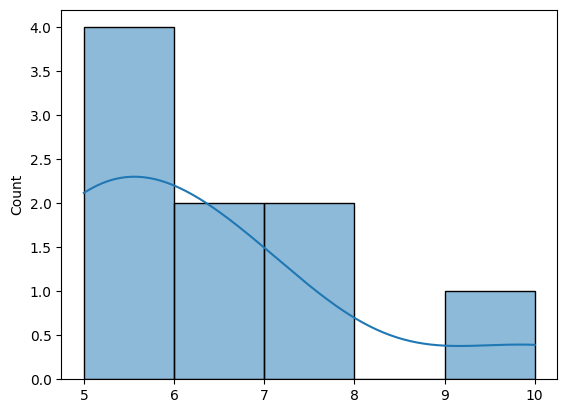

In [93]:
k = np.array([[1 ,0 , 1], [1, 1 ,0],[1, 0 ,1]])
k = np.kron(k, k)
G = nx.from_numpy_array(k)
analysis_graph(G)

In [104]:
k = np.array([[0 ,1 , 1], [1, 0 ,1],[1, 0 ,0]])
k = np.array([[0, 1, 0],
            [1, 1, 1],
            [0, 1, 0]])
for i in range(3):
    k = np.kron(k, k)
    print(k.shape)
G = nx.from_numpy_array(k)

(9, 9)
(81, 81)
(6561, 6561)


num_edges =  195313
num_nodes =  6561
average_degree =  59.537570492303004
density =  0.009075849160412043
diameter =  2
average_shortest_path_length = 1.9909241973078167
avg_clustering =  0.2639467185482808
transivity =  0.026851984520717465
assortativity =  -0.20856054187456133

 centralization metrics 
----------------------------
degree_centralization =  0.9915312789352926
betweenness_centralization =  0.5375368547597259
closeness_centralization =  0.9953687726612249
pagerank_centralization =  0.030132216962515446


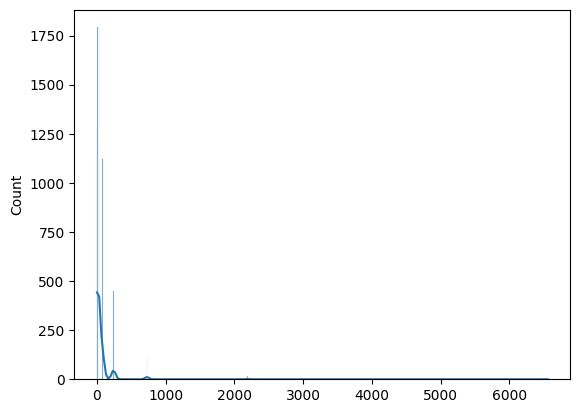

In [105]:
analysis_graph(G)

In [126]:
k = 2
n = 12
B = np.random.randint(2, size=(4,4))
print('\n B = ',B)
# Generate Kronecker initiator matrix
K = B
for i in range(n-1):
    K = np.kron(K, B)

print('\n K.shape = ', K.shape)



 B =  [[1 1]
 [0 1]]

 K.shape =  (4096, 4096)


In [ ]:
import itertools

matrices = list(itertools.product([0, 1], repeat=4))

for matrix in matrices:
    print(np.array(matrix).reshape(2,2))


In [7]:

# Define Kronecker parameters
k = 2
n = 6


for i in range(100):
    print("\n-------------------")
    # Generate base matrix
    B = np.random.randint(2, size=(4,4))
    print('\n B = ',B)
    # Generate Kronecker initiator matrix
    K = B
    for i in range(n-1):
        K = np.kron(K, B)

    print('\n K.shape = ', K.shape)

    G = nx.from_numpy_array(K)

    num_edges = len(G.edges)
    print('num_edges = ',num_edges)
    num_nodes = len(G.nodes)
    print('num_nodes = ',num_nodes)
    average_degree = (num_edges * 2) / num_nodes
    print('average_degree = ',average_degree)

    if (average_degree > 25) & (average_degree < 55):
        density = nx.density(G)
        print('density = ',density)

        if nx.is_connected(G) :

            diameter = nx.diameter(G)
            print('diameter = ',diameter)
            average_shortest_path_length = nx.average_shortest_path_length(G)
            print('average_shortest_path_length =',average_shortest_path_length )

        else:
            largest_cc = max(nx.connected_components(G), key=len)
            G_cc = G.subgraph(largest_cc)
            diameter = nx.diameter(G_cc)
            print('diameter = ',diameter)
            average_shortest_path_length = nx.average_shortest_path_length(G_cc)
            print('average_shortest_path_length =',average_shortest_path_length )

        avg_clustering = nx.average_clustering(G)
        print('avg_clustering = ',avg_clustering)


-------------------

 B =  [[0 1 0 0]
 [0 1 0 0]
 [0 1 0 1]
 [1 0 0 0]]

 K.shape =  (4096, 4096)
num_edges =  15625
num_nodes =  4096
average_degree =  7.62939453125

-------------------

 B =  [[1 1 0 0]
 [1 1 1 0]
 [0 0 0 1]
 [0 0 0 1]]

 K.shape =  (4096, 4096)
num_edges =  110201
num_nodes =  4096
average_degree =  53.80908203125
density =  0.013140190972222222
diameter =  4
average_shortest_path_length = 3.319148375496032
avg_clustering =  0.2867827801296059

-------------------

 B =  [[0 1 0 0]
 [0 0 0 0]
 [1 0 0 1]
 [0 0 0 1]]

 K.shape =  (4096, 4096)
num_edges =  4096
num_nodes =  4096
average_degree =  2.0

-------------------

 B =  [[0 1 1 1]
 [0 1 1 0]
 [0 1 1 0]
 [0 1 0 1]]

 K.shape =  (4096, 4096)
num_edges =  523993
num_nodes =  4096
average_degree =  255.85595703125

-------------------

 B =  [[0 0 0 0]
 [1 0 1 0]
 [1 1 1 1]
 [0 1 0 1]]

 K.shape =  (4096, 4096)
num_edges =  260128
num_nodes =  4096
average_degree =  127.015625

-------------------

 B =  [[0 0 0 


 K.shape =  (4096, 4096)
num_edges =  110201
num_nodes =  4096
average_degree =  53.80908203125
density =  0.013140190972222222
diameter =  4
average_shortest_path_length = 3.319148375496032
avg_clustering =  0.2867827801296059
transivity =  0.24061585737854674
assortativity =  0.023777412564154242

 centralization metrics 
----------------------------
degree_centralization =  0.16520665460577524
betweenness_centralization =  0.11720201940666498
closeness_centralization =  0.48973096163763485
pagerank_centralization =  0.0028379711277116927


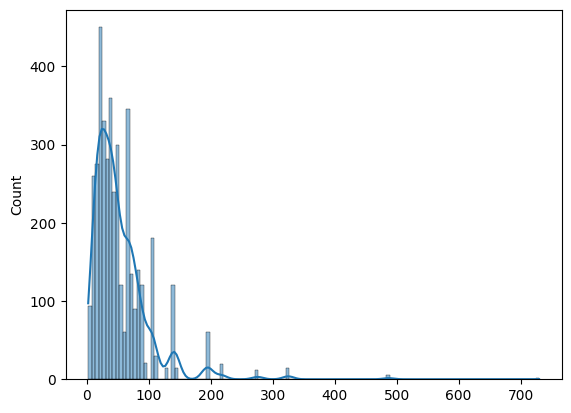

In [12]:
B = [[1, 1, 0, 0],
 [1, 1, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1]]

K = B
for i in range(n-1):
    K = np.kron(K, B)

print('\n K.shape = ', K.shape)
G = nx.from_numpy_array(K)
analysis_graph(G)


In [141]:

# Define Kronecker parameters
k = 2
n = 12

matrices = list(itertools.product([0, 1], repeat=4))

for matrix in matrices:
    print("\n-------------------")
    # Generate base matrix
    B = np.array(matrix).reshape(2,2)
    print('\n B = ',B)
    # Generate Kronecker initiator matrix
    K = B
    for i in range(n-1):
        K = np.kron(K, B)

    print('\n K.shape = ', K.shape)

    G = nx.from_numpy_array(K)

    num_edges = len(G.edges)
    print('num_edges = ',num_edges)
    num_nodes = len(G.nodes)
    print('num_nodes = ',num_nodes)
    average_degree = (num_edges * 2) / num_nodes
    print('average_degree = ',average_degree)

    if (average_degree > 10) & (average_degree < 150):
        density = nx.density(G)
        print('density = ',density)

        if nx.is_connected(G) :

            diameter = nx.diameter(G)
            print('diameter = ',diameter)
            average_shortest_path_length = nx.average_shortest_path_length(G)
            print('average_shortest_path_length =',average_shortest_path_length )

        else:
            largest_cc = max(nx.connected_components(G), key=len)
            G_cc = G.subgraph(largest_cc)
            diameter = nx.diameter(G_cc)
            print('diameter = ',diameter)
            average_shortest_path_length = nx.average_shortest_path_length(G_cc)
            print('average_shortest_path_length =',average_shortest_path_length )

        avg_clustering = nx.average_clustering(G)
        print('avg_clustering = ',avg_clustering)


-------------------

 B =  [[0 0]
 [0 0]]

 K.shape =  (4096, 4096)
num_edges =  0
num_nodes =  4096
average_degree =  0.0

-------------------

 B =  [[0 0]
 [0 1]]

 K.shape =  (4096, 4096)
num_edges =  1
num_nodes =  4096
average_degree =  0.00048828125

-------------------

 B =  [[0 0]
 [1 0]]

 K.shape =  (4096, 4096)
num_edges =  1
num_nodes =  4096
average_degree =  0.00048828125

-------------------

 B =  [[0 0]
 [1 1]]

 K.shape =  (4096, 4096)
num_edges =  4096
num_nodes =  4096
average_degree =  2.0

-------------------

 B =  [[0 1]
 [0 0]]

 K.shape =  (4096, 4096)
num_edges =  1
num_nodes =  4096
average_degree =  0.00048828125

-------------------

 B =  [[0 1]
 [0 1]]

 K.shape =  (4096, 4096)
num_edges =  4096
num_nodes =  4096
average_degree =  2.0

-------------------

 B =  [[0 1]
 [1 0]]

 K.shape =  (4096, 4096)
num_edges =  2048
num_nodes =  4096
average_degree =  1.0

-------------------

 B =  [[0 1]
 [1 1]]

 K.shape =  (4096, 4096)
num_edges =  265721
num_

In [33]:
import networkx as nx
import random

def forest_fire_graph(n, p, f):
    """
    Simulates a graph using the forest-fire model with parameters:
    n - number of nodes
    p - forward burning probability
    f - backward burning probability
    """
    # Create an empty graph
    G = nx.Graph()

    # Add the first node
    G.add_node(0)

    # Initialize the list of burning nodes
    burning = [0]

    # Start the simulation
    for i in range(1, n):
        # Add a new node
        G.add_node(i)

        # Choose a random burning node
        j = random.choice(burning)

        # Add an edge between the new node and the burning node with probability p
        if random.random() < p:
            G.add_edge(i, j)

        # Add edges between the new node and its neighbors with probability f
        for k in G.neighbors(i):
            if random.random() < f:
                G.add_edge(i, k)

        # Mark the new node as burning
        if random.random() < (1 - (1-f)**len(list(G.neighbors(i)))):
            burning.append(i)

    return G


Value	Name
1858	# Nodes
12534	# Edges
13.49	Average degree
0.007	Density
14	    Diameter
0.14	Average Clustering coefficient
0.09	Transitivity
3.45	Average shortest path length
-0.08	Assortativity (Degree Correlation)
0.14	Degree Centralization
0.08	Betweenness Centralization
0.29	Closeness Centralization
0.008	PageRank Centralization

powerlaw_cluster_graph(1858, 7, 0.4, seed=None)

num_edges =  12933
num_nodes =  1858
average_degree =  13.921420882669537
density =  0.007496726377312621
diameter =  4
average_shortest_path_length = 2.82043041979465
avg_clustering =  0.12321585505624182
transivity =  0.04738795684311073
assortativity =  -0.09960154075633709

num_edges =  12926
num_nodes =  1858
average_degree =  13.91388589881593
density =  0.007492668766190593
diameter =  4
average_shortest_path_length = 2.8095079103128824
avg_clustering =  0.14004242418352106
transivity =  0.05008201492142442
assortativity =  -0.10734768419996489

 centralization metrics 
----------------------------
degree_centralization =  0.1612323129630661
betweenness_centralization =  0.12031687626474767
closeness_centralization =  0.3560335345199241
pagerank_centralization =  0.009943354850655891


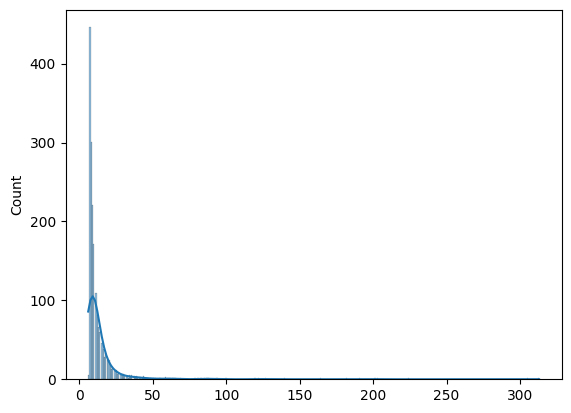

In [69]:
G= nx.powerlaw_cluster_graph(1858, 7, 0.40, seed=1984)
analysis_graph(G)